<a href="https://colab.research.google.com/github/BalkisG77/Deep-Learning-/blob/main/TP_Dog_Balkis_GOUIAA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet : Classification des images en fonction de la race des chiens   

# 1.Chargez toutes les librairies 

In [54]:
#Importer les librairies 
import cv2
import numpy as np
import requests
import itertools
import shutil
import random
import pathlib
import os
import sys
import datetime
import glob
import pathlib
import random as rn
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import datetime
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc
from keras.utils.np_utils import to_categorical
from keras import layers
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'imread', 'concatenate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 2.Exploration de la data 

**Lire les Datatsets** 

In [55]:
annotation = !tar -xvf /content/drive/MyDrive/annotation.tar
data = !tar -xvf /content/drive/MyDrive/images.tar


In [56]:
chihuahua_dir = '/content/Images/n02085620-Chihuahua'
japanese_spaniel_dir = '/content/Images/n02085782-Japanese_spaniel'
maltese_dir = '/content/Images/n02085936-Maltese_dog'
pekinese_dir = '/content/Images/n02086079-Pekinese'
shitzu_dir = '/content/Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = '/content/Images/n02086646-Blenheim_spaniel'
papillon_dir = '/content/Images/n02086910-papillon'
toy_terrier_dir = '/content/Images/n02087046-toy_terrier'
afghan_hound_dir = '/content/Images/n02088094-Afghan_hound'
basset_dir = '/content/Images/n02088238-basset'


X = []
Z = []
imgsize = 150

In [57]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [58]:
#renvoie le nombre des éléments en data
image_count = len(data)
print(image_count)

20701


In [59]:
#renvoie le nombre des éléments en annotation 
image = len(annotation )
print(image)

20701


Définir les Catégories 

In [60]:
#renvoie la liste des categories et leurs nombres 
fpath = "/content/Images"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02093991-Irish_terrier', 'n02113978-Mexican_hairless', 'n02099849-Chesapeake_Bay_retriever', 'n02107908-Appenzeller', 'n02106550-Rottweiler', 'n02116738-African_hunting_dog', 'n02097047-miniature_schnauzer', 'n02096177-cairn', 'n02100236-German_short-haired_pointer', 'n02099429-curly-coated_retriever', 'n02091635-otterhound', 'n02104365-schipperke', 'n02097658-silky_terrier', 'n02095889-Sealyham_terrier', 'n02098413-Lhasa', 'n02102973-Irish_water_spaniel', 'n02099601-golden_retriever', 'n02096051-Airedale', 'n02105412-kelpie', 'n02115913-dhole'] 

No. of categories =  20


In [61]:
# lire les images et leurs labels 
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #redimensionner l'image à 227 x 227 car la résolution de l'image d'entrée pour AlexNet est de 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3298 
No. of labels loaded =  3298
<class 'list'> <class 'list'>


In [62]:
#shape des images et des labels 
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3298, 227, 227, 3) 
Labels shape =  (3298,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


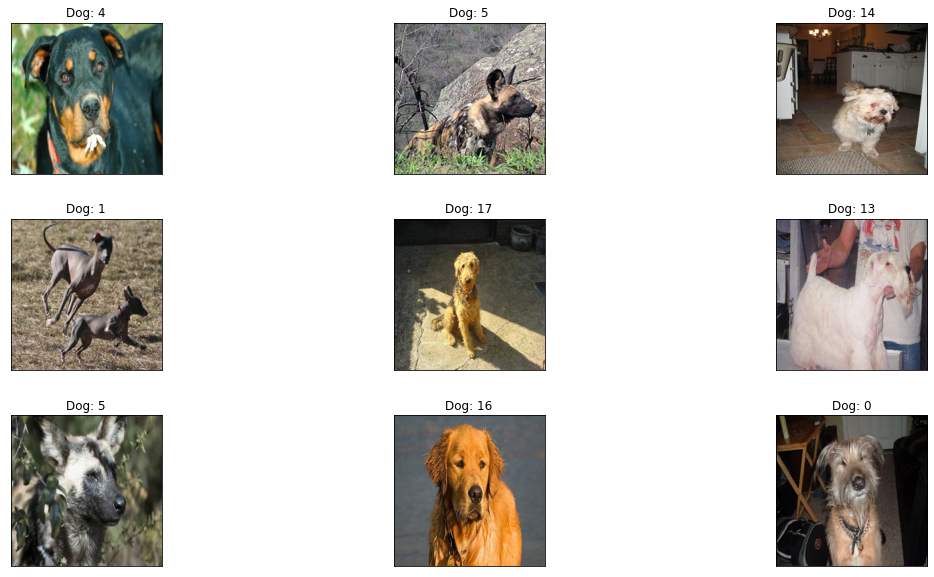

In [63]:
#Affichier les images par labels
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #ax[i,j].set_title('Dog: '+Z[l])
        plt.title('Dog: {}'.format(labels[r[0]]))
        #plt.title('Dog: '+Z[l])
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# Préparer les données pour le modèle CNN

In [64]:
#Affiche le nombre des valeurs par la liste des chiffres 
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#ajoute toutes les valeurs de la liste 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3295 3296 3297]

'n' values after shuffling =  [2129 1278 3226 ... 1294  860 3174]


In [65]:
#shape des images et des labels aprés l'ajout 
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3298, 227, 227, 3) 
Labels shape after shuffling =  (3298,)


**Normalisation des données**

In [66]:
#Forme des images après normalisation
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3298, 227, 227, 3)


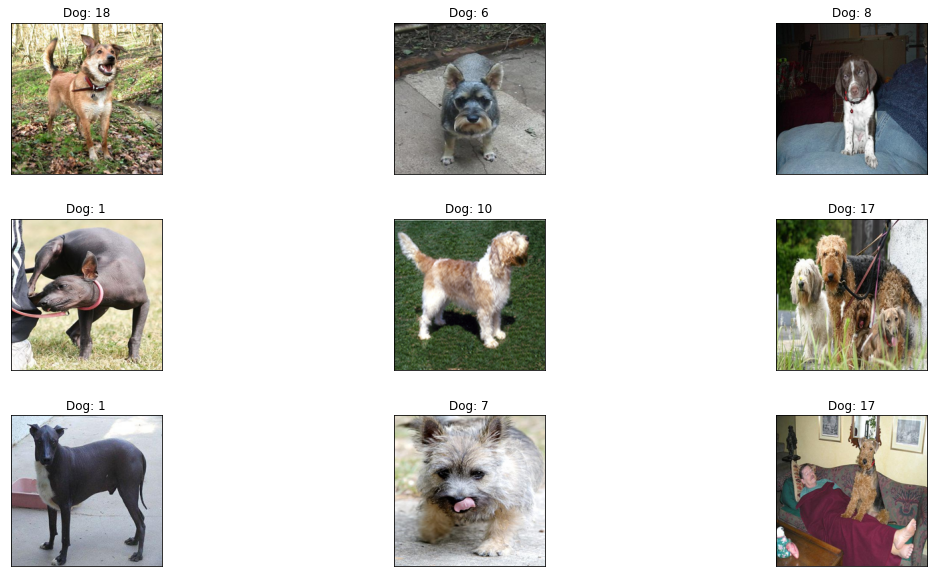

In [67]:
#Affiche les images par labels 
display_rand_images(images, labels)

In [68]:
#Preparer le training data pour affciher la race des chiens 
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:00<00:00, 320.88it/s]


**Diviser l'ensemble de données en train et test**

In [69]:
#Diviser les données en train et test 
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2638, 227, 227, 3)
y_train shape =  (2638,)

x_test shape =  (660, 227, 227, 3)
y_test shape =  (660,)


In [75]:
images


array([[[[0.80784315, 0.8666667 , 0.6431373 ],
         [0.74509805, 0.8039216 , 0.57254905],
         [0.7647059 , 0.8235294 , 0.5882353 ],
         ...,
         [0.8784314 , 0.92941177, 0.65882355],
         [0.8509804 , 0.9137255 , 0.63529414],
         [0.8509804 , 0.9137255 , 0.63529414]],

        [[0.8352941 , 0.89411765, 0.6666667 ],
         [0.75686276, 0.8156863 , 0.58431375],
         [0.7529412 , 0.8117647 , 0.5764706 ],
         ...,
         [0.8509804 , 0.8980392 , 0.6313726 ],
         [0.84313726, 0.9019608 , 0.6313726 ],
         [0.84313726, 0.9019608 , 0.6313726 ]],

        [[0.8666667 , 0.9254902 , 0.69803923],
         [0.7764706 , 0.8352941 , 0.6039216 ],
         [0.7411765 , 0.8       , 0.5647059 ],
         ...,
         [0.8156863 , 0.85882354, 0.60784316],
         [0.8352941 , 0.8901961 , 0.63529414],
         [0.8352941 , 0.89411765, 0.63529414]],

        ...,

        [[0.46666667, 0.54901963, 0.45882353],
         [0.45490196, 0.5411765 , 0.4509804 ]

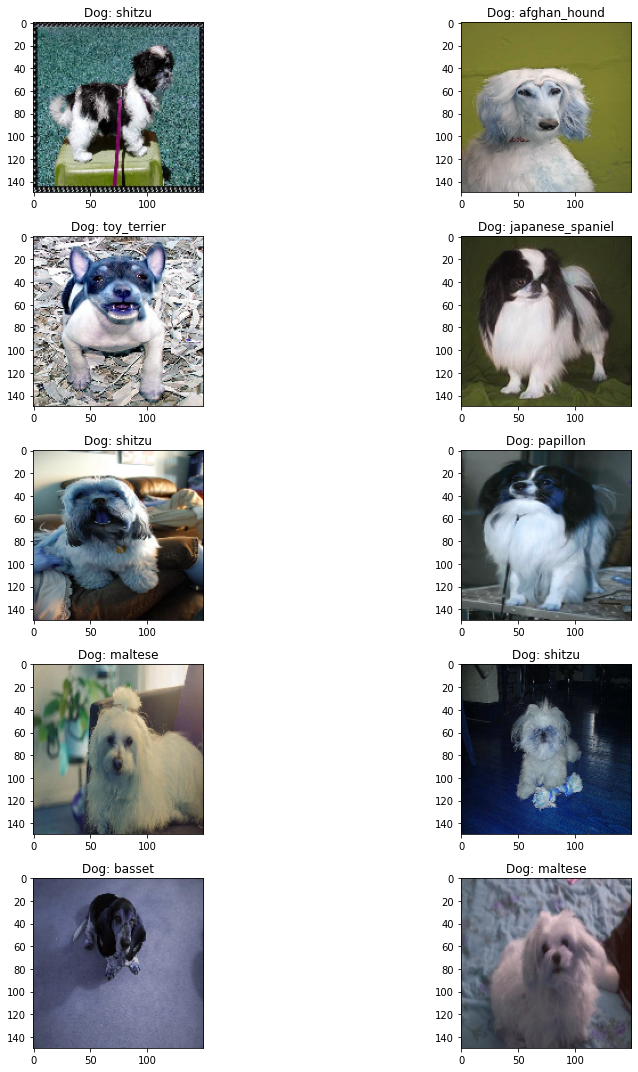

In [70]:
#Afficher les images des chiens par races 
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

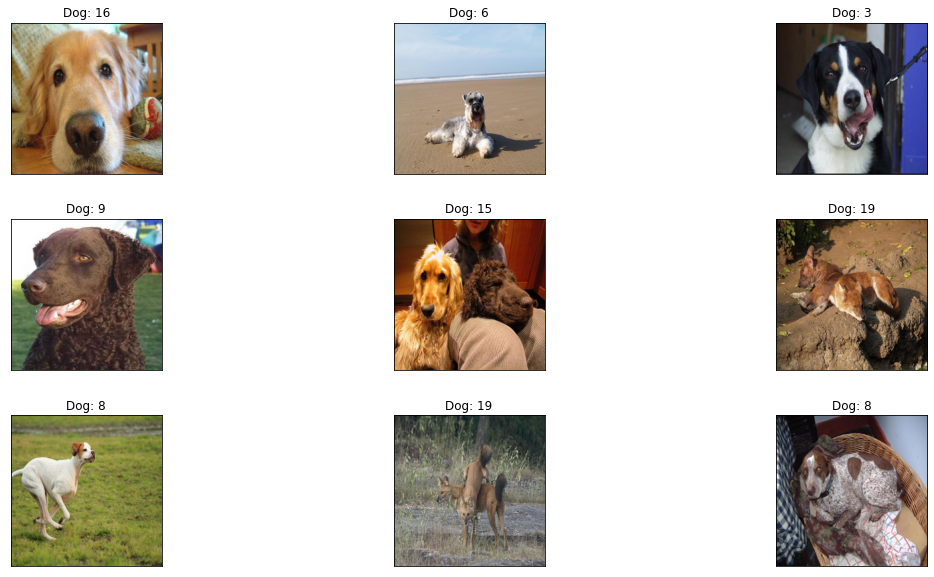

In [71]:
#Afficher les images des chiens par labels numéroter 
display_rand_images(x_train, y_train)

# 4.Définir le modèle AlexNet CNN

In [72]:
#Définir toutes les couches d'entrée et de max pool dans le modèle AlexNet CNN
model=Sequential()

#1 couche conv = conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 couche conv
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 couche conv
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 couche conv
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 couche conv
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 384)        

In [73]:
#Compilez le modèle CNN
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 5.Entrainement du model

In [74]:
# initialiser le nombre d'époques et la taille du lot (epochs and batch size)
EPOCHS = 100
BS = 32
# construire le générateur d'images d'entraînement pour l'augmentation des données
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
# entrainement du CNN 
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
	epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
82/82 [==============================] - 29s 328ms/step - loss: 3.8419 - accuracy: 0.0726 - val_loss: 10.9567 - val_accuracy: 0.0697
Epoch 2/100
82/82 [==============================] - 27s 324ms/step - loss: 3.3239 - accuracy: 0.0716 - val_loss: 3.6418 - val_accuracy: 0.1061
Epoch 3/100
82/82 [==============================] - 27s 324ms/step - loss: 3.2887 - accuracy: 0.0980 - val_loss: 3.0793 - val_accuracy: 0.0848
Epoch 4/100
82/82 [==============================] - 26s 323ms/step - loss: 3.1846 - accuracy: 0.1047 - val_loss: 2.9661 - val_accuracy: 0.1424
Epoch 5/100
82/82 [==============================] - 27s 324ms/step - loss: 3.0941 - accuracy: 0.1115 - val_loss: 2.7377 - val_accuracy: 0.1697
Epoch 6/100
82/82 [==============================] - 26s 320ms/step - loss: 3.0506 - accuracy: 0.1169 - val_loss: 3.9415 - val_accuracy: 0.0985
Epoch 7/100
82/82 [==============================] - 26s 321ms/step - loss: 2.9991 - accuracy: 0.1376 - val_loss: 3.6470 - val_accuracy

KeyboardInterrupt: ignored

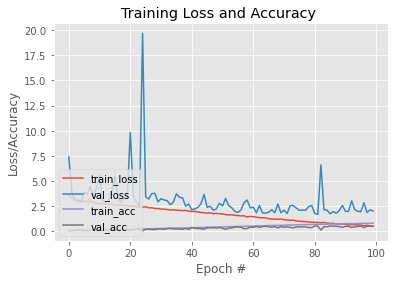

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.title('Training and validation accuracy')
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
#Afficher les métriques pour évaluer la précision et la perte dans l'ensemble de données de test
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

21/21 [==============================] - 0s 20ms/step - loss: 2.0353 - accuracy: 0.5409
2.03529691696167 0.5409091114997864


# 6.Prédire les valeurs à l'aide du modèle entraîné

In [ ]:
#. Prédire les valeurs du modèle 
pred = model.predict(x_test)

pred.shape

(660, 20)

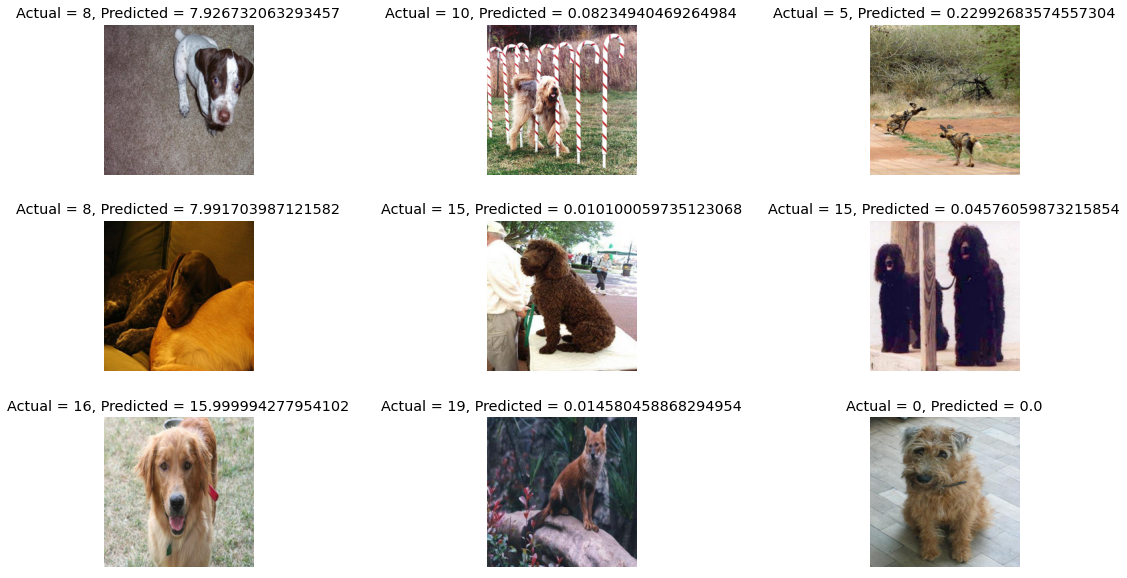

In [ ]:
#Afficher quelques images aléatoires avec des valeurs d'étiquettes réelles ou prévues
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()


# Afficher les courbes de précision et de validation 

Text(0.5, 1.0, 'Training and validation loss')

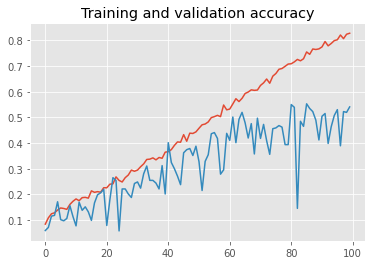

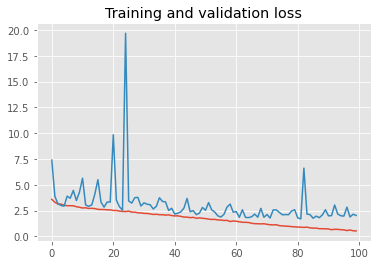

In [ ]:
# Récupérer une liste des résultats de précision sur les données d'entraînement et de validation
# Afficher les ensembles pour chaque époque d'entrainement 
acc =H.history['accuracy']
val_acc = H.history['val_accuracy']

# Récupérer une liste de résultats de liste sur les données d'entraînement et de validation
# Afficher les ensembles pour chaque époque d'entrainement 
loss = H.history['loss']
val_loss = H.history['val_loss']

# Obtenir le nombre d'époques
epochs = range(len(acc))

# Tracer la précision et la validation par époque
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Tracer l'entrainement et la perte de validation par époque
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Transfer Learning avec VGG16

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

In [ ]:
model = VGG16(include_top=False)

In [ ]:
new_input = Input(shape=(227, 227, 3))
model = VGG16(include_top=False, input_tensor=new_input)

In [ ]:
new_input = Input(shape=(227, 227, 3))
model = VGG16(include_top=False, input_tensor=new_input)

In [ ]:
new_input = Input(shape=(227, 227, 3))
model = VGG16(include_top=False, input_tensor=new_input, pooling='avg')

In [ ]:
model = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(227, 227, 3)))

In [ ]:
from keras.applications.vgg16 import preprocess_input

# définir un nouveau modèle avec des poids aléatoires et 10 classes
new_input = Input(shape=(227, 227, 3))
model1= VGG16(weights=None, input_tensor=new_input, classes=10)

In [ ]:
# exemple de chargement du modèle vgg16
from keras.applications.vgg16 import VGG16
model1= VGG16()
# résumer le modèle
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Compilez le modèle CNN
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
EPOCHS = 10
BS = 32
# construire le générateur d'images d'entraînement pour l'augmentation des données
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
# entrainement du CNN 
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
	epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


RuntimeError: ignored

# InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# résumer le modèle
model.summary()

96116736/96112376 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 149, 149, 32) 864         input_23[0][0]                   
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 149, 149, 32) 96          conv2d_14[0][0]                  
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 149, 149, 32) 0           batch_normalization_6[0][0]      
______________________

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
EPOCHS = 10
BS = 32
# construire le générateur d'images d'entraînement pour l'augmentation des données
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
# entrainement du CNN 
H1 = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
	epochs=EPOCHS)

Epoch 1/10
82/82 [==============================] - ETA: 0s - loss: 1.8429 - accuracy: 0.4206

ValueError: ignored

# ResNet50

In [ ]:

# example of loading the resnet50 model
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_32[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/Images/n02085620-Chihuahua/n02085620_10074.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [ ]:


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('/content/Images/n02085620-Chihuahua/n02085620_10074.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


Chihuahua (99.93%)
